### 11.0.0 Problem Statement
In this classification problem we will be attempting to predict the behavior of customers who visit our retail store:

1. During Holidays
2. Based on the size of the store
3. Based on the type of store

### 11.0.1 Dataset
Let us firstly load our data set.

In [1]:
#Import numpy and pandas as their standard aliases. Also import other important variables
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
# Read the file 'master_dataset.xlsx' into a DataFrame df using the read_xls() function.
df = pd.read_excel('master_dataset.xlsx', sheetname='Sheet1')

In [3]:
# Check the dataset type
type(df)

pandas.core.frame.DataFrame

### 11.0.2 EDA
Printing out the indices of the data set we will see the features of the dataset. The features include :
1. The identity elements
* Store Type (Store)
* Date (Date of Sale)

2. Regional Features
* Temperature
* Fuel Price
* CPI
* Unemployment Rate (Unemployment)

3. Promotional Features
* MarkDown 1 (Sales Promotion announced during Labor Day Holiday)
* MarkDown 2 (Sales Promotion annouced during Independence Day Holiday)
* MarkDown 3 (Sales Promotion announced during Thanksgiving)
* MarkDown 4 (Sales Promotion announced during Christmas)
* MarkDown 5 (Sales Promotion announced in the Summer)

4. Sales Features
* Weekly sales for different types of items: Jewelry - Smart Home Items [Index[14 - Index[95] ~ 81 features in total.

5. Target Features
* IsHoliday
* Type (Store Type: A - SuperStores, B - NeighboorhoodStores, C- WholeSaleStores)
* Size (Store Size)

In [4]:
print(df.keys())

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Jewelry', 'Pets', 'TV_Video',
       'Cell_Phones', 'Pharmaceutical ', 'Health_beauty', 'Toy ',
       'Home_others', 'Kitchen', 'Bedding', 'Bathroom', 'Office_supplies ',
       'School_Supplies', 'Home_Office', 'Craft_general', 'Floral', 'Beading',
       'Paint', 'Framing', 'outdoor', 'Auto', 'School_Uniforms',
       'Baby_Toddlers_Clothing', 'Baby_Kids_Shoes', 'Clearance_Clothings',
       'Boys_Clothing', 'Girls_Clothing', 'Women_Clothing',
       'Intimates_Sleepwears', 'Men_Clothings', 'Precious_Metals',
       'Active_Wear', 'Adult_Shoes', 'Bags_Accessories', 'Sportswear',
       'Computer', 'Music', 'Luggage', 'Food', 'Fruit', 'Grocery', 'Laundry',
       'IPad_Tablets', 'Heating_Cooling', 'Swim_Shop', 'Gift_cards',
       'Baby_Essentials', 'Cribs', 'Car_Seats', 'Strollers', 'Bikes', 'Photo',
       '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8190 entries, 0 to 8189
Data columns (total 94 columns):
Store                     8190 non-null int64
Temperature               8190 non-null float64
Fuel_Price                8190 non-null float64
MarkDown1                 8190 non-null float64
MarkDown2                 8190 non-null float64
MarkDown3                 8190 non-null float64
MarkDown4                 8190 non-null float64
MarkDown5                 8190 non-null float64
CPI                       8190 non-null float64
Unemployment              8190 non-null float64
IsHoliday                 8190 non-null bool
Type                      8190 non-null object
Size                      8190 non-null int64
Jewelry                   8190 non-null float64
Pets                      8190 non-null float64
TV_Video                  8190 non-null float64
Cell_Phones               8190 non-null float64
Pharmaceutical            8190 non-null float64
Health_beauty             8190 non-nu

#### 11.0.3.1 IsHoliday as Target Variable

Target Variable: IsHoliday
* True
* False

In this section, we will predict sales of different items based on whether the the period of sales is a holiday or not. Therefore we will use the Sales features listed in  11.0.2 as the features and the target features as the target.

Let us convert the both the features and the target to numpy array.


In [6]:
# Select the Sales features and call the new dataframe 'df_sales'
df_sales = df.iloc[:,14:95]

In [7]:
df_sales.head()

,Pets,TV_Video,Cell_Phones,Pharmaceutical,Health_beauty,Toy,Home_others,Kitchen,Bedding,Bathroom,...,Books,Musical_Instruments,Star_Wars,Movies_TV,Video_Games,Portable_Audios,Cameras_Camcoders,Auto_Electronics,Wearable_Tech,Smart_homes
0,45829.02,9775.17,34912.45,23381.38,2876.19,16481.79,34658.25,44977.91,29764.24,16227.08,...,73315.81,57022.45,118966.90,58034.24,56157.83,113009.41,27930.71,32954.82,10344.16,0.01
1,47450.50,11157.08,37809.49,29967.92,4132.61,22427.62,38151.58,25435.02,31794.04,21762.46,...,77280.42,57845.36,126907.41,63245.00,66172.11,111466.37,5265.09,30149.20,14740.14,0.01
2,47077.72,7857.88,39773.71,18887.71,4541.91,22589.00,35580.01,21032.55,29779.96,26880.74,...,78602.71,59462.22,122267.65,69962.56,62795.87,124821.44,5265.09,33726.13,10139.42,0.01
3,47928.89,11523.47,36826.95,26468.27,6060.26,19985.20,38717.60,15880.85,29634.13,18706.21,...,76091.36,63011.44,135066.75,62581.64,72212.32,107952.07,28420.73,31585.78,12087.95,20.00
4,44292.87,11135.17,34660.16,24101.89,5244.56,17224.22,35318.20,15175.52,27921.96,17306.61,...,71718.48,57335.17,125048.08,57630.02,55501.07,103652.58,28420.73,28457.31,10871.74,20.00


In [8]:
# Select 'IsHoliday' column as the target and call the new data frame 'df_targetIsHol'
df_targetIsHol = df['IsHoliday']

In [9]:
df_targetIsHol.head()

0    False
1     True
2    False
3    False
4    False
Name: IsHoliday, dtype: bool

In [10]:
# convert df_sales to numpy array
df_sales.values

array([[  4.58290200e+04,   9.77517000e+03,   3.49124500e+04, ...,
          3.29548200e+04,   1.03441600e+04,   1.00000000e-02],
       [  4.74505000e+04,   1.11570800e+04,   3.78094900e+04, ...,
          3.01492000e+04,   1.47401400e+04,   1.00000000e-02],
       [  4.70777200e+04,   7.85788000e+03,   3.97737100e+04, ...,
          3.37261300e+04,   1.01394200e+04,   1.00000000e-02],
       ..., 
       [  3.36341200e+04,   6.88010000e+03,   2.36150400e+04, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  3.36341200e+04,   6.88010000e+03,   2.36150400e+04, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00],
       [  3.36341200e+04,   6.88010000e+03,   2.36150400e+04, ...,
          6.46332000e+03,   1.06102000e+03,   7.00000000e+00]])

In [11]:
# calculate the shape of the numpy array (df_sales.values)
df_sales.values.shape

(8190, 80)

In [12]:
# convert df_targetIsHol to numpy array
df_targetIsHol.values

array([False,  True, False, ..., False, False, False], dtype=bool)

In [13]:
# calculate the shape of the numpy array (df_targetIsHol.values)
df_targetIsHol.values.shape

(8190,)

In [14]:
# Confirm that both df_sales.values and df_targetIsHol.values are numpy arrays
type(df_sales.values), type (df_targetIsHol.values)

(numpy.ndarray, numpy.ndarray)

Thus we have 8190 samples and 81 features

In [15]:
# Assign X and y to the features and target data respectively
X = df_sales.values
y = df_targetIsHol.values


In [16]:
# Build the data frame of the feature data
df_feature = pd.DataFrame(X, columns=df_sales.columns.values)

In [17]:
print(df_feature.head())

       Pets  TV_Video  Cell_Phones  Pharmaceutical   Health_beauty      Toy   \
0  45829.02   9775.17     34912.45         23381.38        2876.19  16481.79   
1  47450.50  11157.08     37809.49         29967.92        4132.61  22427.62   
2  47077.72   7857.88     39773.71         18887.71        4541.91  22589.00   
3  47928.89  11523.47     36826.95         26468.27        6060.26  19985.20   
4  44292.87  11135.17     34660.16         24101.89        5244.56  17224.22   

   Home_others   Kitchen   Bedding  Bathroom     ...          Books  \
0     34658.25  44977.91  29764.24  16227.08     ...       73315.81   
1     38151.58  25435.02  31794.04  21762.46     ...       77280.42   
2     35580.01  21032.55  29779.96  26880.74     ...       78602.71   
3     38717.60  15880.85  29634.13  18706.21     ...       76091.36   
4     35318.20  15175.52  27921.96  17306.61     ...       71718.48   

   Musical_Instruments  Star_Wars  Movies_TV  Video_Games  Portable_Audios  \
0             

#### 11.0.3.2 Visual EDA
Generate scattter plot for df_features. We will extract the first five features for visualization 


In [18]:
#Extract the first five features for visualization 
df_5feature = df_feature.iloc[:,0:4]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000A1BD9E8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000BCA3978>]], dtype=object)

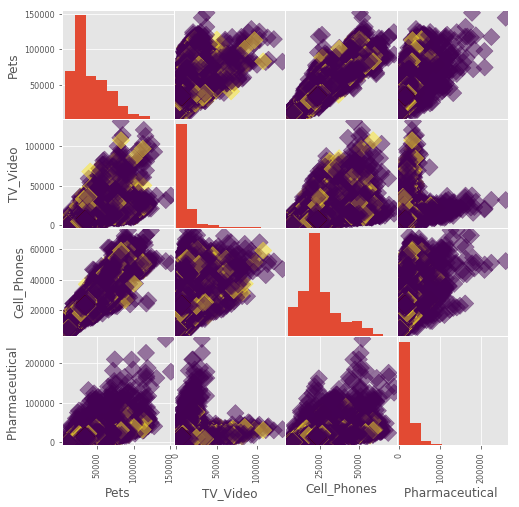

In [19]:
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
pd.scatter_matrix(df_5feature, c=y, figsize = [8, 8], s=150, marker = 'D')


#### 11.0.1.4 k-Nearest Neighbors
The basic idea in this analysis is to predict the label of a data point by 
* Looking at the 'k' closest labeled data points
* Taking a majority vote

##### 11.0.1.4.1 Fitting a Classifier 
Firstly, we will import necessary libraries. Then we will create an instance of a k-NN classifier with 6 neighbors (by specifying the n_neighbors parameter) and then fit it to the data. 

In [21]:
# import classifier
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# Set n_neighbors = 6 and assign it to knn
knn = KNeighborsClassifier(n_neighbors=6)

In [23]:
# fit the classifier to the training set
knn.fit(df_sales.values, df_targetIsHol.values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [24]:
df_sales.values.shape

(8190, 80)

In [25]:
df_targetIsHol.values.shape

(8190,)

##### 11.0.1.4.3 Measuring the Model's Performance
We are going to use accuracy as our metric for measuring the model's performance. Accuracy is the fraction of correct predictions. Here we are concerned on how well our model performs on new data. In order to achieve this, we will split the data into two: 

* a training set
* a test set

We will fit/train the classifier on the training set, then we will make predictions on the test set. And then we will compare the prediction with the known labels by computing the accuracy of the model.

###### 11.0.1.4.4 Splitting the data
import the required libraries

In [26]:
#import libraries
from sklearn.model_selection import train_test_split

In [27]:
# randomly split the data so that the test_size will be 1/3 of the initial sample size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=21, stratify=y)

In [28]:
#define the classifier
knn = KNeighborsClassifier(n_neighbors=8)

In [29]:
#fit the classifier to the X_train and y_train
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

##### 11.0.1.4.5 Prediction 
We will run prediction on the X_test and store the result as y_pred

In [30]:
y_pred = knn.predict(X_test)

In [31]:
# print the test set
print("Test set predictions: \n {}".format(y_pred))

Test set predictions: 
 [False False False ..., False False False]


##### 11.0.1.4.6 Model Accuracy
To compute the accuracy of the model we use score:

In [32]:
knn.score(X_test, y_test)

0.92836792836792836

#### 11.0.1.4.7 Accuracy Testing (Overfitting & Underfitting)

In [33]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)

In [34]:
#train_accuracy = np.empty(len(neighbors))

In [35]:
#test_accuracy = np.empty(len(neighbors))

In [36]:
# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = 1)

In [37]:
 # Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [38]:
#Compute accuracy on the training set
train_accuracy_1 = knn.score(X_train, y_train)
train_accuracy_1

0.9846502703645561

In [39]:
#Compute accuracy on the testing set
test_accuracy_1 = knn.score(X_test, y_test)
test_accuracy_1

0.8880748880748881

In [39]:
 knn = KNeighborsClassifier(n_neighbors = 2)

In [40]:
 # Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [41]:
#Compute accuracy on the training set
train_accuracy_2 = knn.score(X_train, y_train)
train_accuracy_2

0.93232164660736094

In [42]:
#Compute accuracy on the testing set
test_accuracy_2 = knn.score(X_test, y_test)
test_accuracy_2

0.92551892551892556

In [43]:
# For n_neighbors = 3
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
train_accuracy_3 = knn.score(X_train, y_train)
test_accuracy_3 = knn.score(X_test, y_test)

In [44]:
# For n_neighbors = 4
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
train_accuracy_4 = knn.score(X_train, y_train)
test_accuracy_4 = knn.score(X_test, y_test)

In [45]:
# For n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
train_accuracy_5 = knn.score(X_train, y_train)
test_accuracy_5 = knn.score(X_test, y_test)

In [46]:
# For n_neighbors = 6
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)
train_accuracy_6 = knn.score(X_train, y_train)
test_accuracy_6 = knn.score(X_test, y_test)

In [47]:
# For n_neighbors = 7
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train, y_train)
train_accuracy_7 = knn.score(X_train, y_train)
test_accuracy_7 = knn.score(X_test, y_test)

In [48]:
# For n_neighbors = 8
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
train_accuracy_8 = knn.score(X_train, y_train)
test_accuracy_8 = knn.score(X_test, y_test)

In [49]:
test_accuracy = [test_accuracy_1, test_accuracy_2, test_accuracy_3, test_accuracy_4, test_accuracy_5, test_accuracy_6, 
                 test_accuracy_7, test_accuracy_8]

In [50]:
train_accuracy = [train_accuracy_1, train_accuracy_2, train_accuracy_3, train_accuracy_4,  train_accuracy_5, train_accuracy_6, 
                  train_accuracy_7, train_accuracy_8]

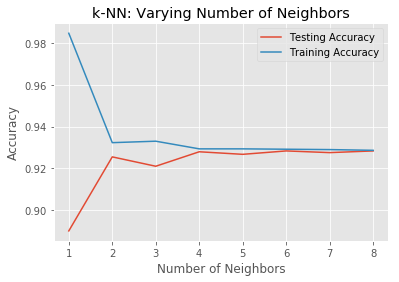

In [51]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

### 11.0.3 Comparison of different Classifiers

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [41]:
# Different classifiers
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

In [42]:
# Compute the classifiers
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

In [43]:
figure = plt.figure(figsize=(27, 9))
i = 1

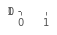

In [44]:
 ax = plt.subplot(len(df_sales.values), len(classifiers) + 1, i)

In [45]:
 # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [46]:
# Plot the training points
%matplotlib inline
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
           edgecolors='k')


In [47]:
# and testing points
ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')

In [ ]:
# iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(df_sales.values), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

In [ ]:
# Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[x.ravel(), y.ravel()])
        else:
            Z = clf.predict_proba(np.c_[x.ravel(), y.ravel()])[:, 1]